# Importing Library

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Loading Dataset

In [14]:
df=pd.read_csv("Processed_Flipdata.csv")
print(f'shape of dataset',data.shape)
data.head()

shape of dataset (541, 11)


,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


In [16]:
# Check unique values for all columns
unique_values = {column: df[column].unique() for column in data.columns}

for column, unique_vals in unique_values.items():
    print(f"Unique values in {column}: {unique_vals}")

Unique values in Model: ['Infinix SMART 7' 'MOTOROLA G32' 'POCO C50' 'Infinix HOT 30i' 'REDMI 10'
 'SAMSUNG Galaxy F13' 'SAMSUNG Galaxy F04' 'POCO C51' 'MOTOROLA e13'
 'vivo T2x 5G' 'Infinix Smart 7 HD' 'REDMI A1+' 'POCO C55' 'MOTOROLA g13'
 'POCO M4 5G' 'MOTOROLA e32' 'vivo T2 5G' 'MOTOROLA G62 5G' 'POCO M5'
 'realme C33 2023' 'SAMSUNG Galaxy F14 5G' 'MOTOROLA g73 5G' 'realme C30'
 'POCO X5 5G' 'POCO M4 Pro' 'REDMI 11 Prime' 'realme C55'
 'realme 10 Pro 5G' 'Micromax IN 2C' 'POCO M4 Pro 5G'
 'realme Narzo 30 Pro 5G' 'micromax 2' 'Infinix Note 12 Pro 5G'
 'SAMSUNG Galaxy F23 5G' 'micromax' 'MOTOROLA Edge 40' 'micromax 1'
 'realme Narzo 30' 'Infinix NOTE 12i' 'realme 10' 'realme 8i' 'Micromax 3'
 'Google Pixel 6a' 'Infinix HOT 20 5G' 'realme GT 2' 'REDMI Note 12'
 'REDMI Note 12 5G' 'micromax 3' 'SAMSUNG Galaxy M04' 'REDMI K50i 5G'
 'MOTOROLA e40' 'REDMI 9 Activ' 'MOTOROLA g42' 'realme C25s'
 'POCO X5 Pro 5G' 'POCO M3 Pro 5G' 'Infinix Smart 6 HD'
 'Infinix Hot 20 5G' 'realme C31' 'micro

In [17]:
# Check unique values and their counts for all columns
unique_counts = {column: df[column].value_counts() for column in data.columns}

for column, value_counts in unique_counts.items():
    print(f"Unique values and counts in {column}:\n{value_counts}\n")

Unique values and counts in Model:
vivo Y16                 9
realme C55               9
SAMSUNG Galaxy A14 5G    9
REDMI Note 12 Pro 5G     9
vivo T1 44W              8
                        ..
vivo Y1s                 1
OnePlus Nord             1
Micromax 3               1
vivo Y33s                1
OPPO A77                 1
Name: Model, Length: 187, dtype: int64

Unique values and counts in Colour:
Yellow            12
Royal Blue         8
Power Black        8
Black              8
Midnight Black     7
                  ..
Polar Blue         1
Cosmic grey        1
Sea                1
Infinity Black     1
Sky Blue           1
Name: Colour, Length: 275, dtype: int64

Unique values and counts in Memory:
128    259
64     169
256     55
32      52
16       6
Name: Memory, dtype: int64

Unique values and counts in RAM:
4    186
8    157
6    121
3     40
2     37
Name: RAM, dtype: int64

Unique values and counts in Battery_:
5000    389
6000     42
4500     26
5080      6
4980      6


In [18]:
df.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000


# Data Preprocessing

In [19]:
#Convert 'Prize' column to numericalby removing commas and converting to integer
df['Prize']=df['Prize'].str.replace(',','').astype(int)

In [20]:
#Handle missing values if any
df=df.dropna()

In [22]:
#drop the index column
df=df.drop(columns=['Unnamed: 0'])

## Feature Engineering

In [23]:
# Feature extraction
def extract_camera_pixels(camera_str):
    if isinstance(camera_str, str):
        return int(camera_str.replace('MP', ''))
    return 0

In [24]:
df['Rear Camera Pixels'] = df['Rear Camera'].apply(extract_camera_pixels)
df['Front Camera Pixels'] = df['Front Camera'].apply(extract_camera_pixels)

In [25]:
# Drop the original camera columns as they are now redundant
df = df.drop(columns=['Rear Camera', 'Front Camera'])

In [26]:
# Identify columns
continuous_cols = ['Memory', 'RAM', 'Battery_', 'Mobile Height', 'Rear Camera Pixels', 'Front Camera Pixels']
discrete_cols = ['AI Lens', 'Prize']
categorical_cols = ['Model', 'Colour', 'Processor_']

# Visualizations before removing outliers

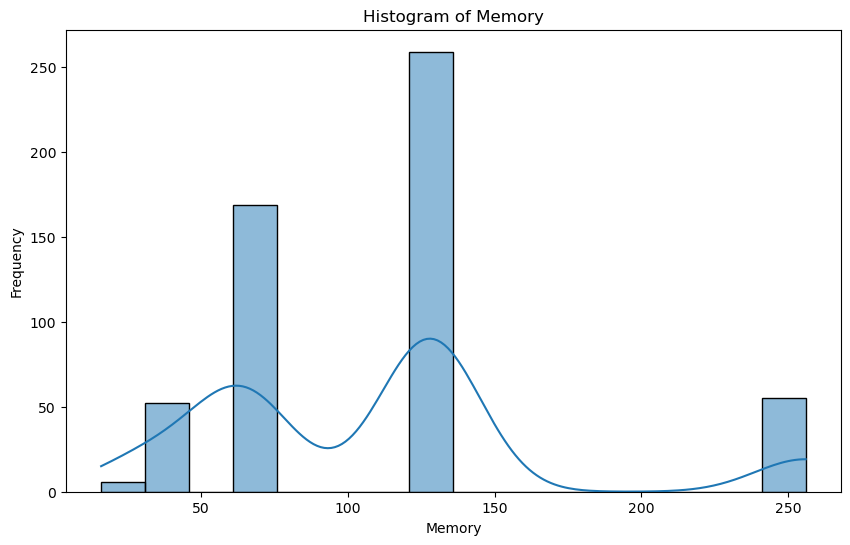

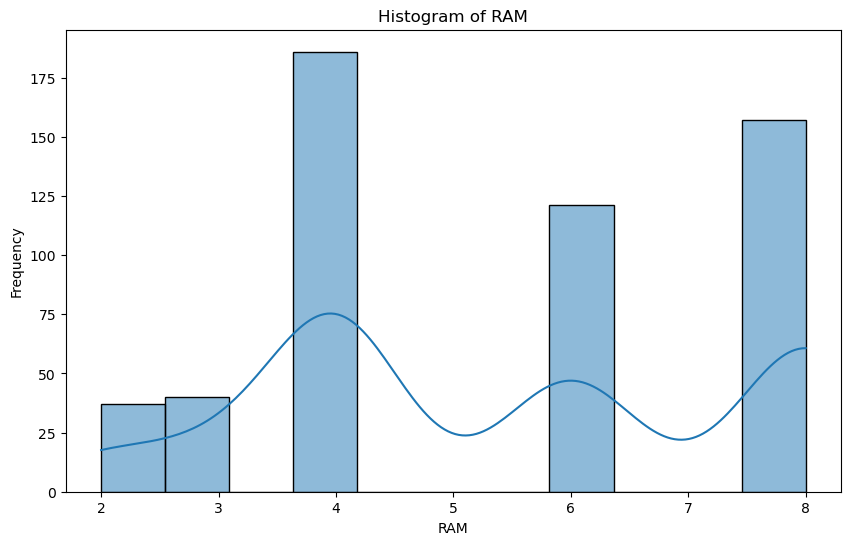

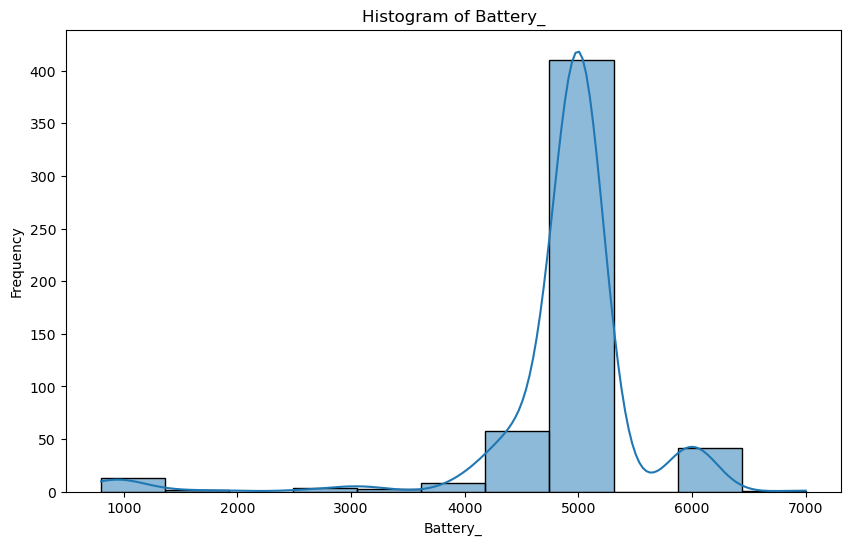

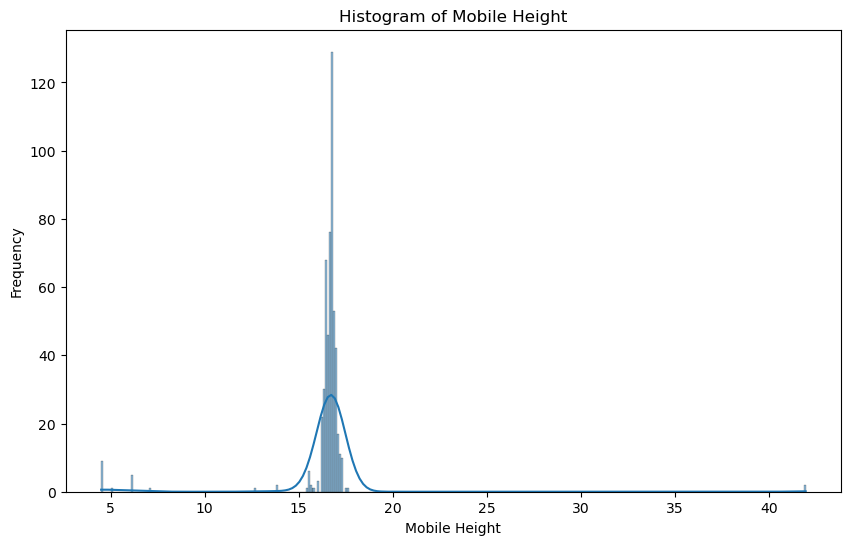

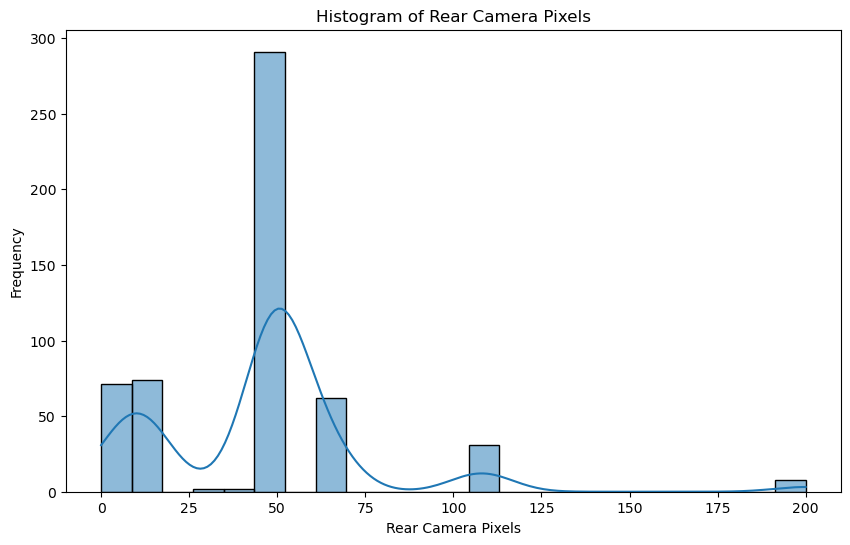

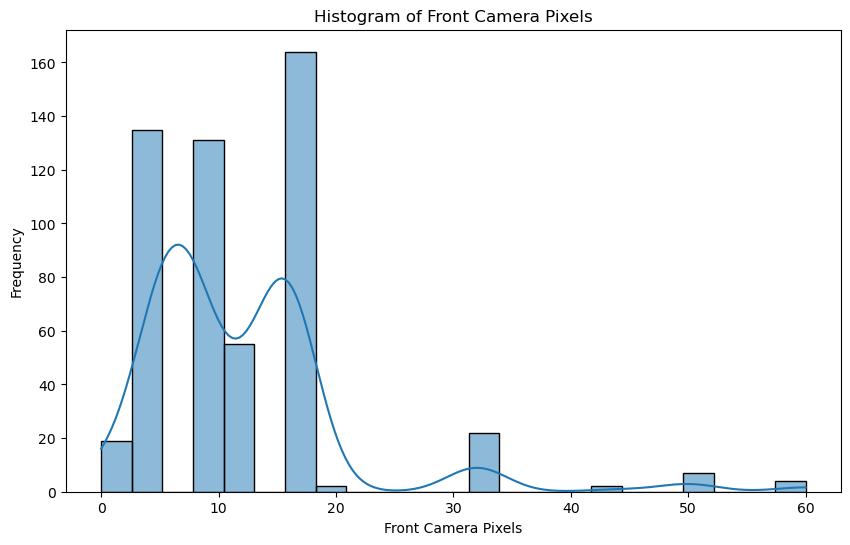

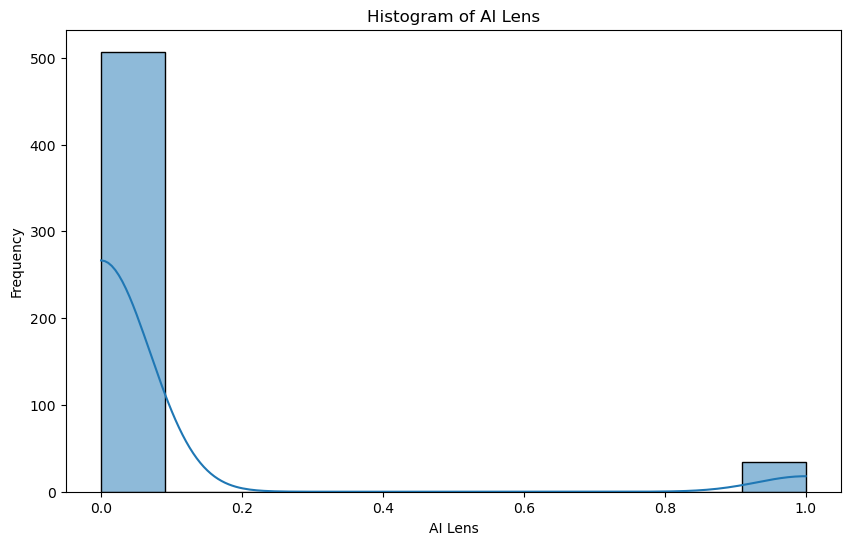

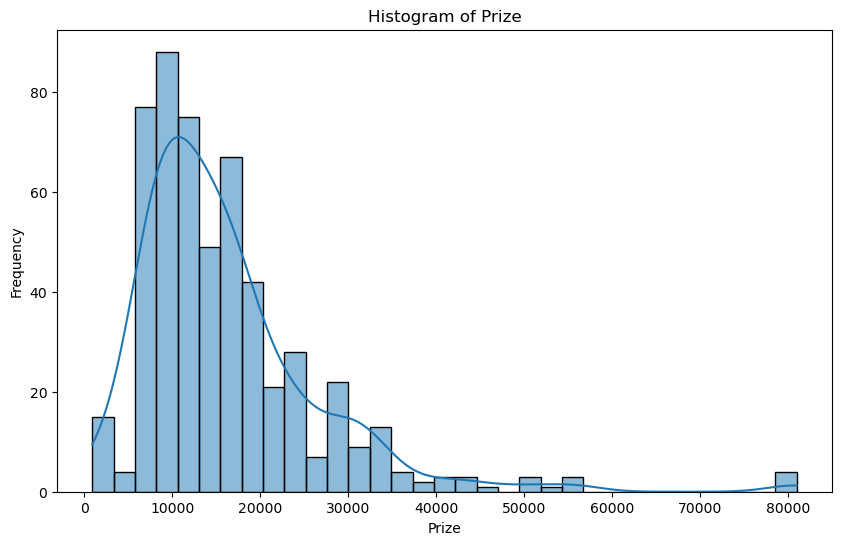

In [27]:
# Histograms for continuous and discrete columns
for col in continuous_cols + discrete_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

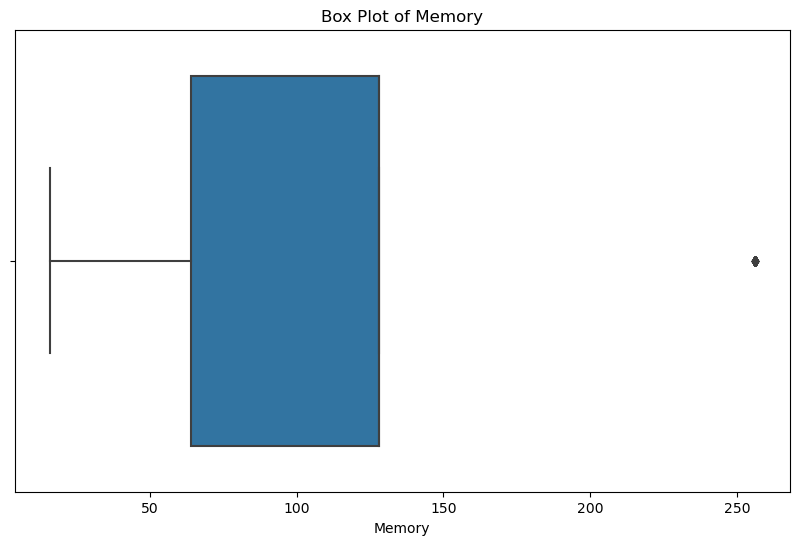

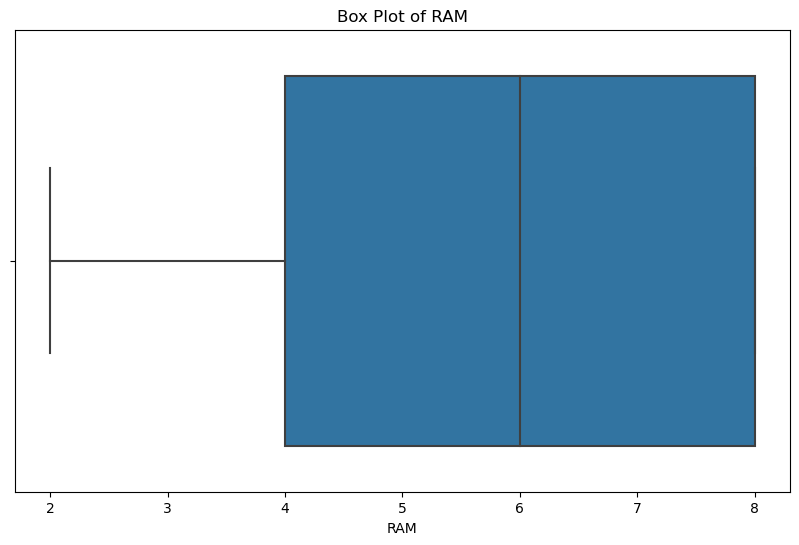

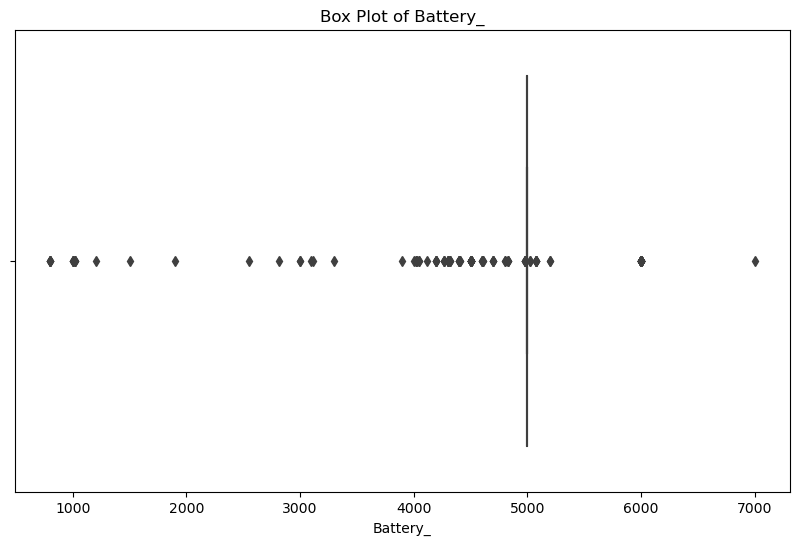

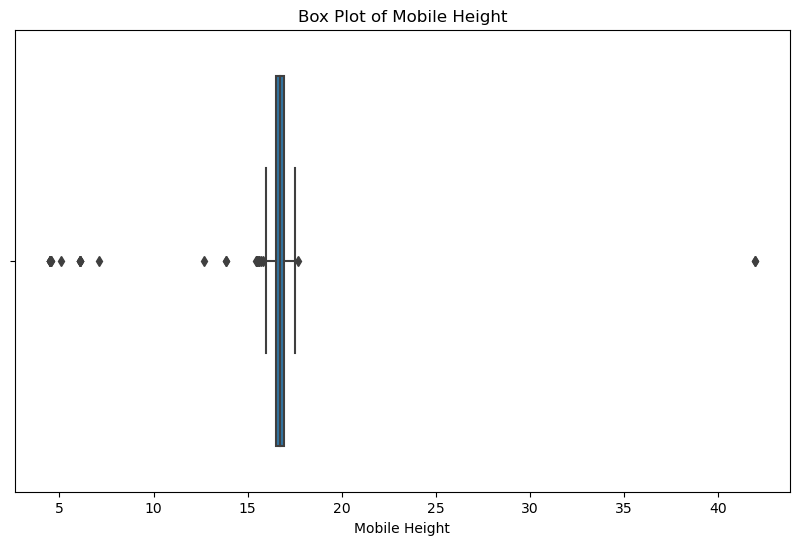

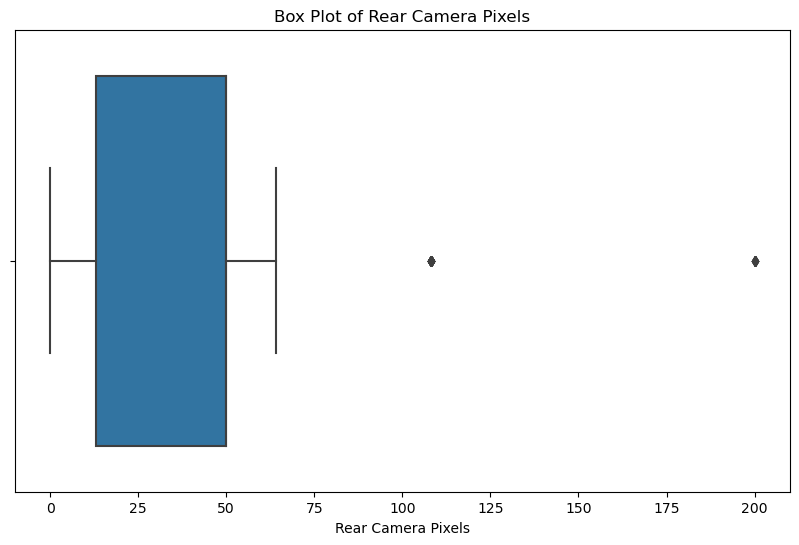

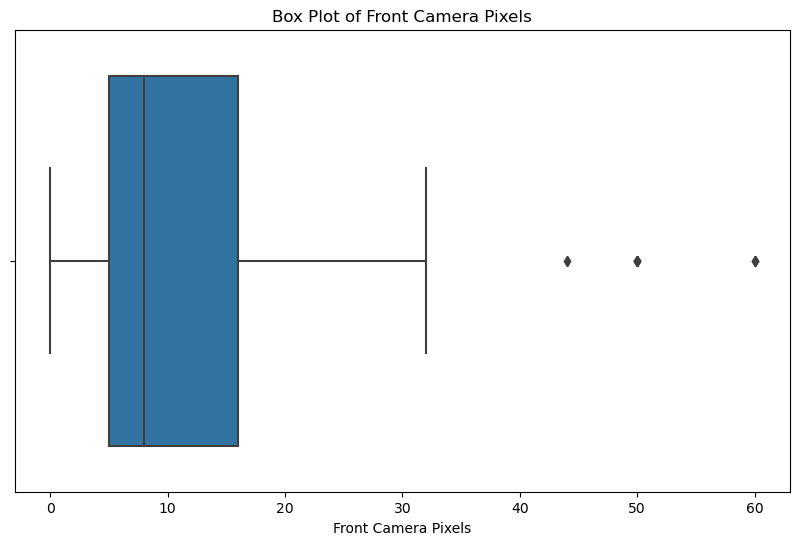

In [28]:
# Box plots for continuous columns
for col in continuous_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

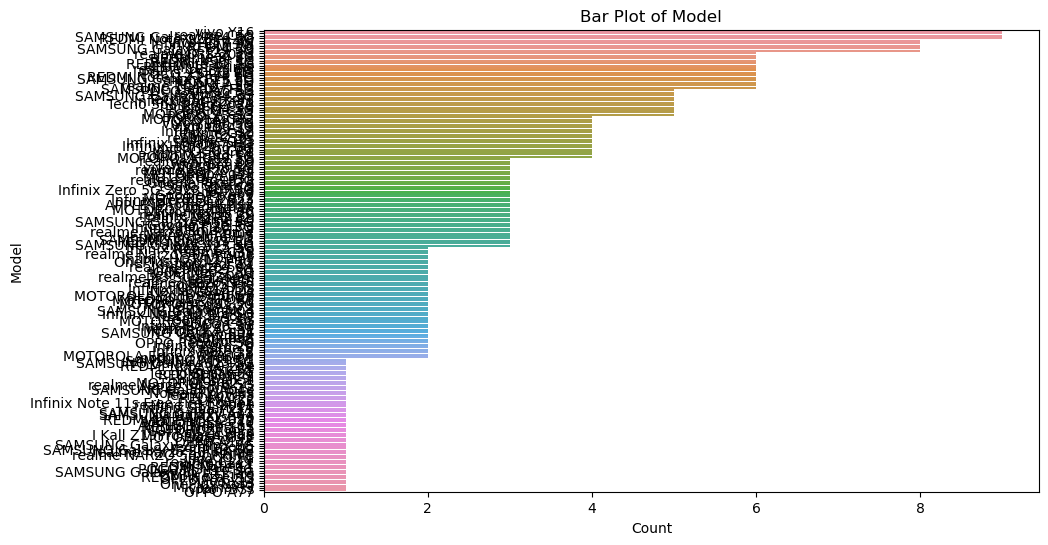

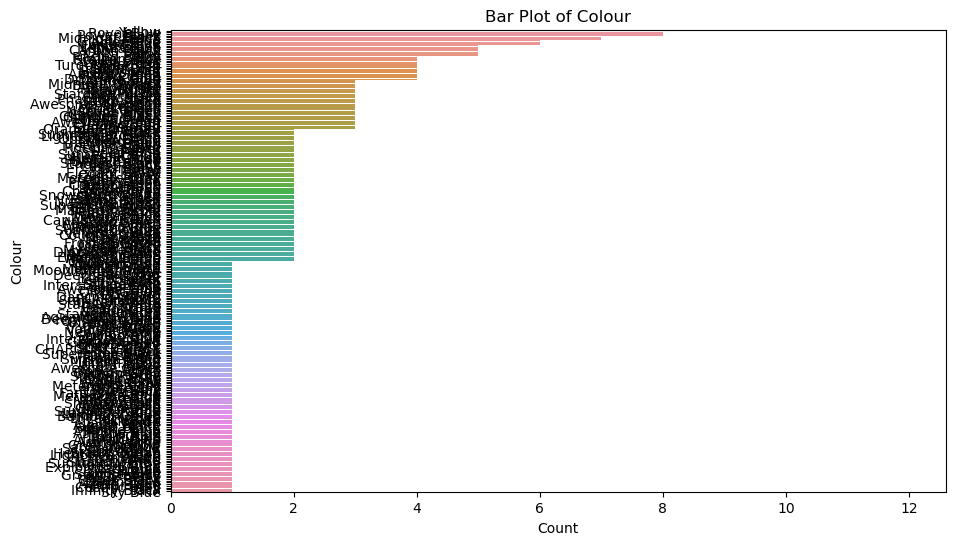

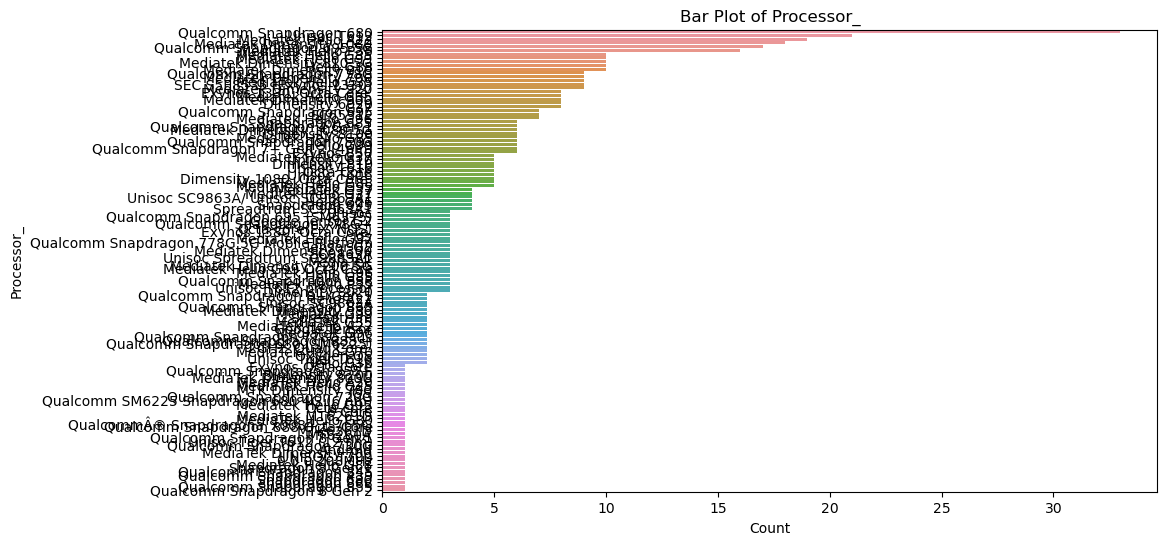

In [29]:
# Bar plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Bar Plot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()


<Figure size 1200x1200 with 0 Axes>

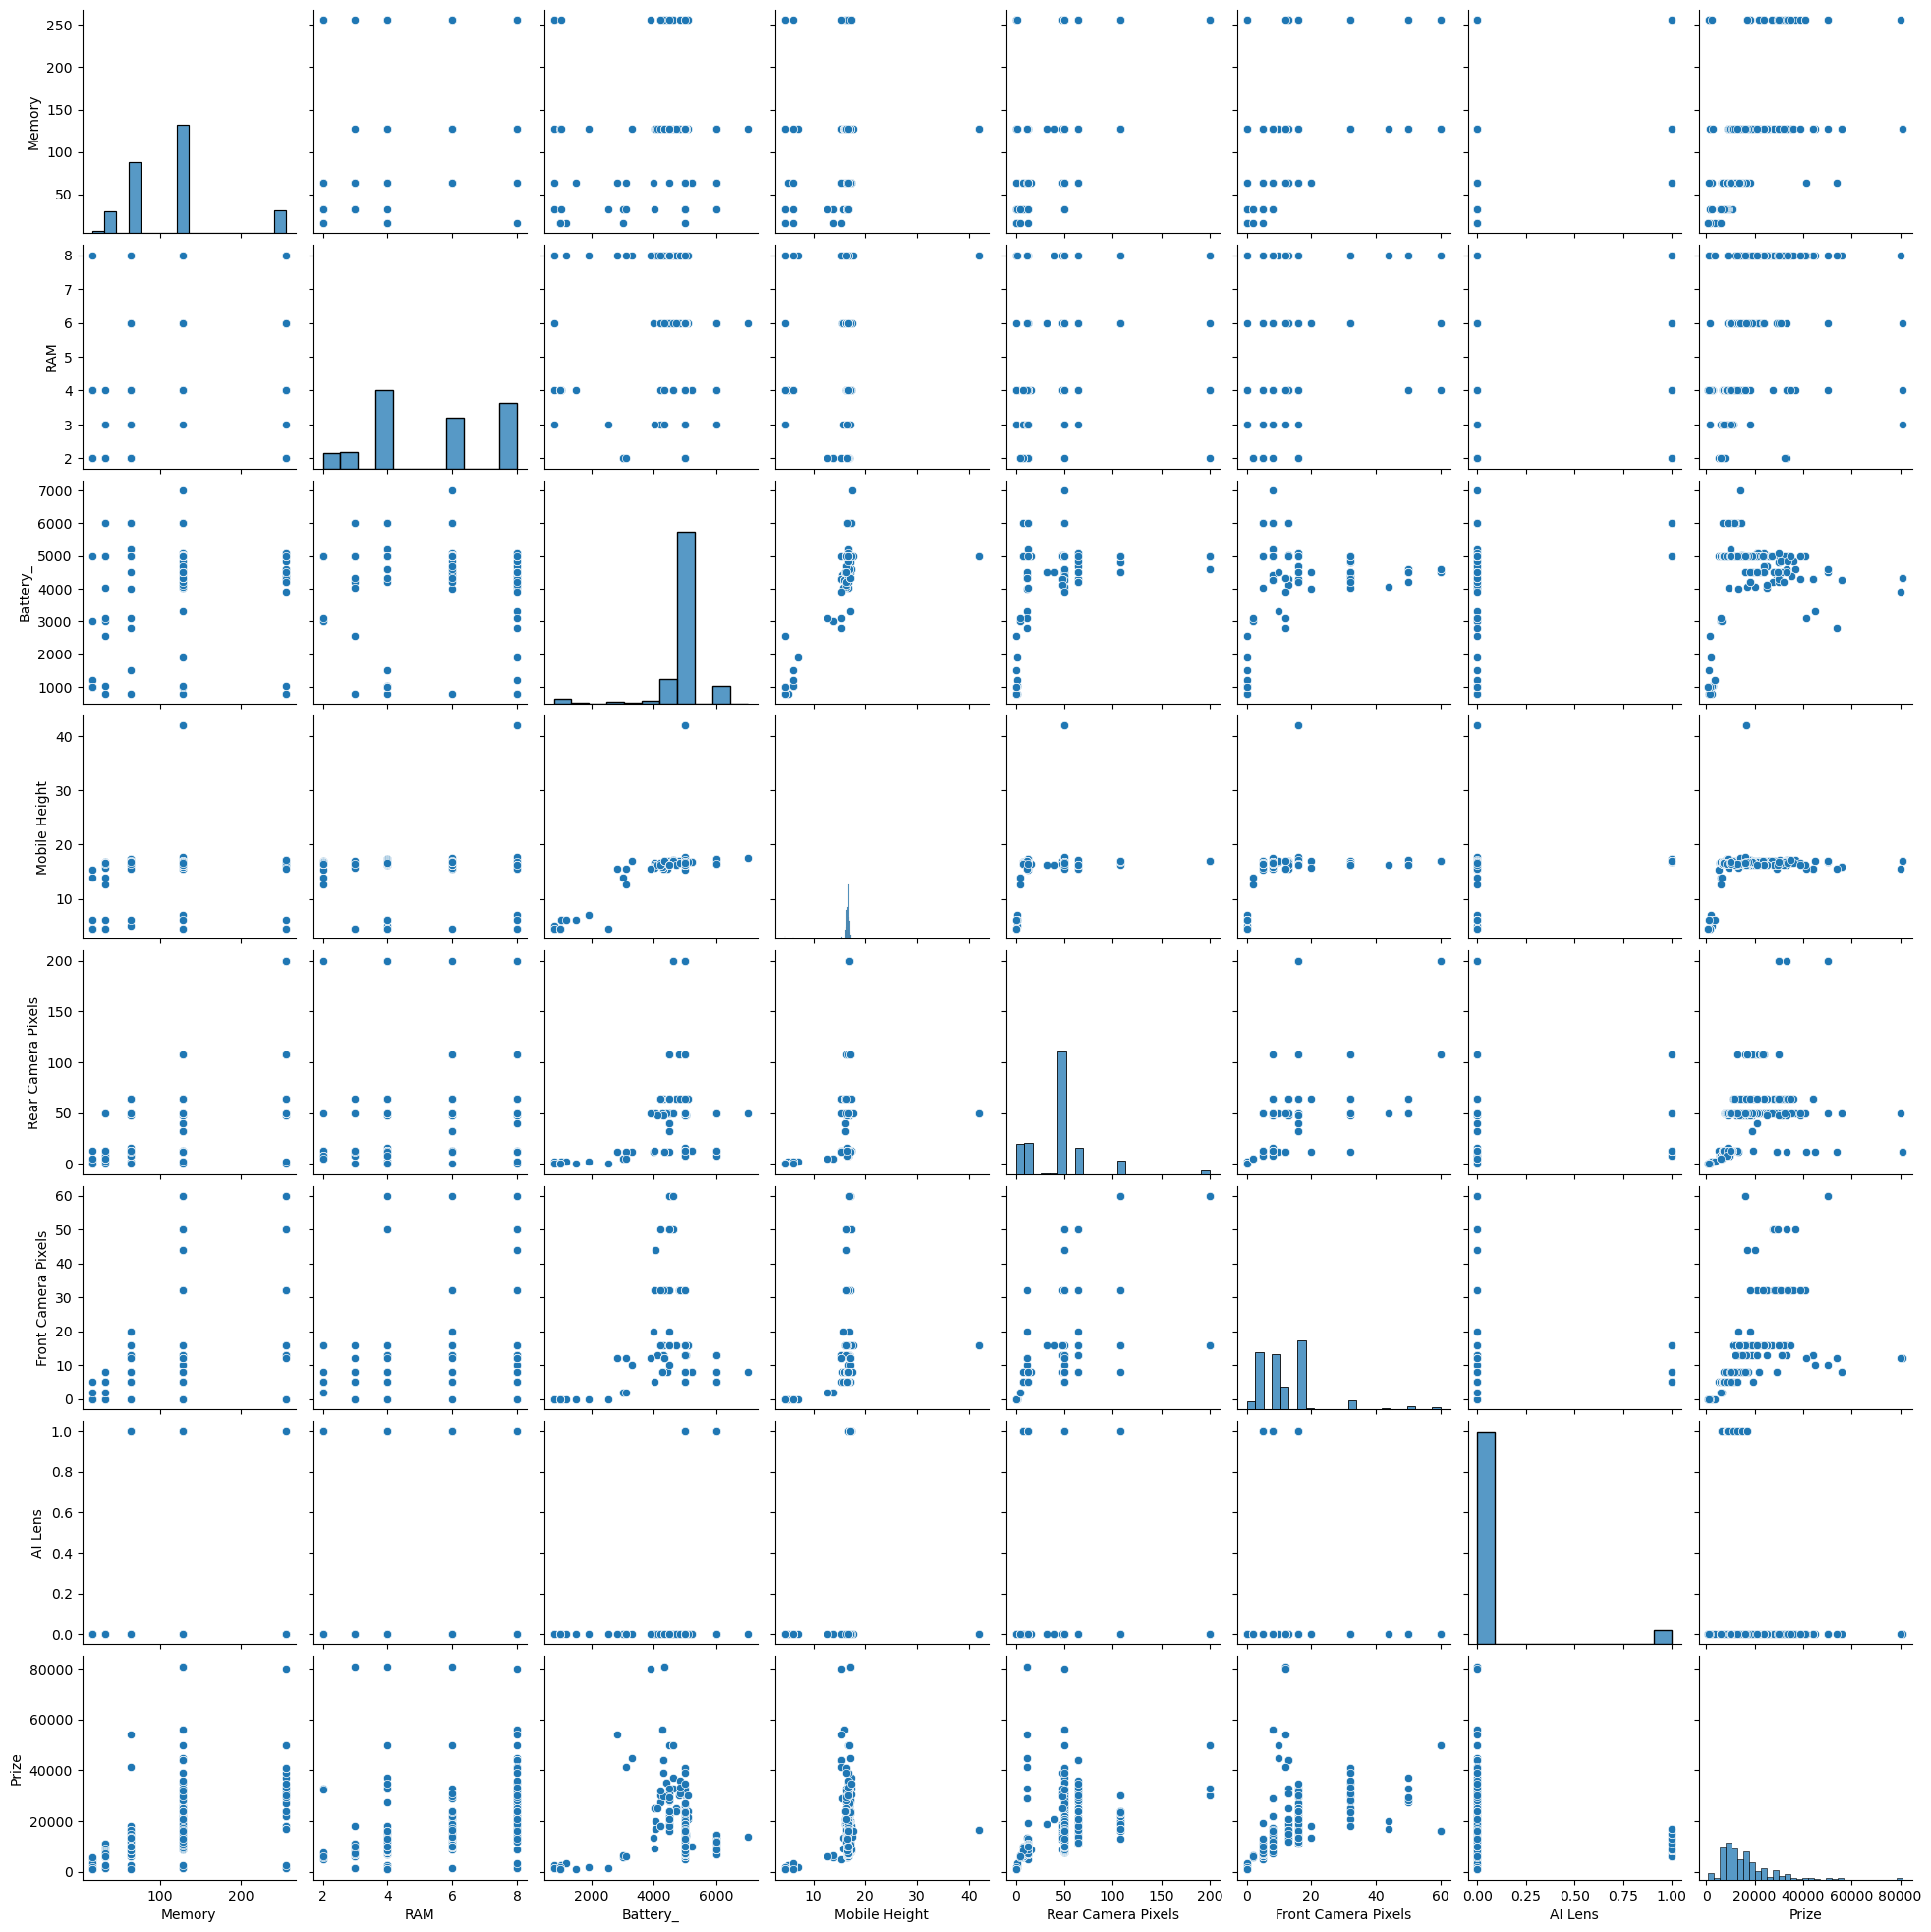

In [30]:
# Pair plots for relationships between numerical features
plt.figure(figsize=(12, 12))
sns.pairplot(df[continuous_cols + discrete_cols])
plt.show()

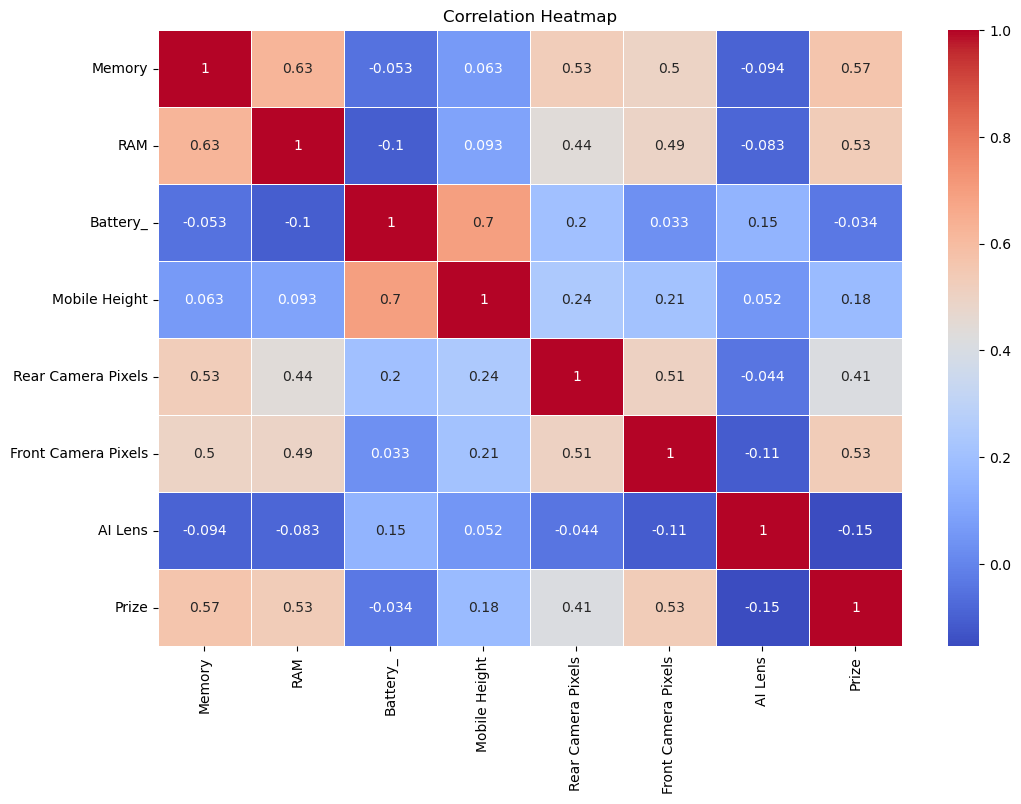

In [31]:
# Heatmap for correlation between numerical features
plt.figure(figsize=(12, 8))
corr_matrix = df[continuous_cols + discrete_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Bivariate analysis

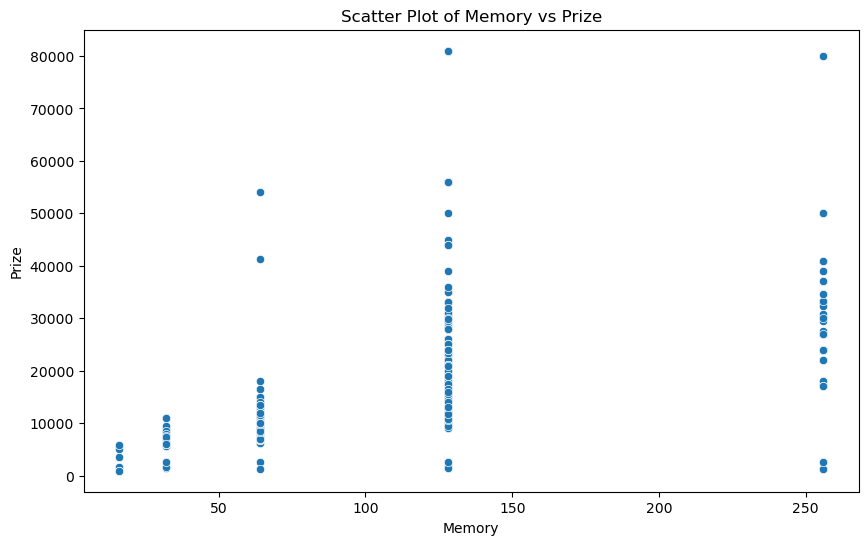

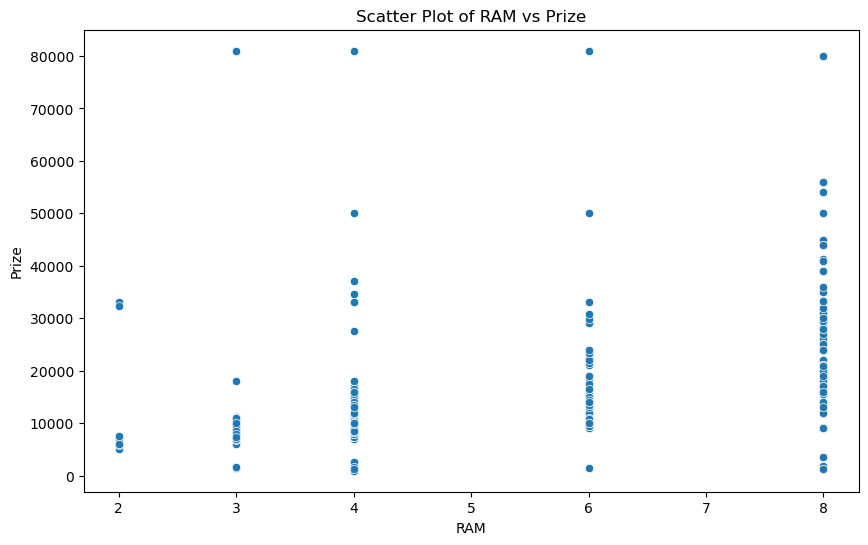

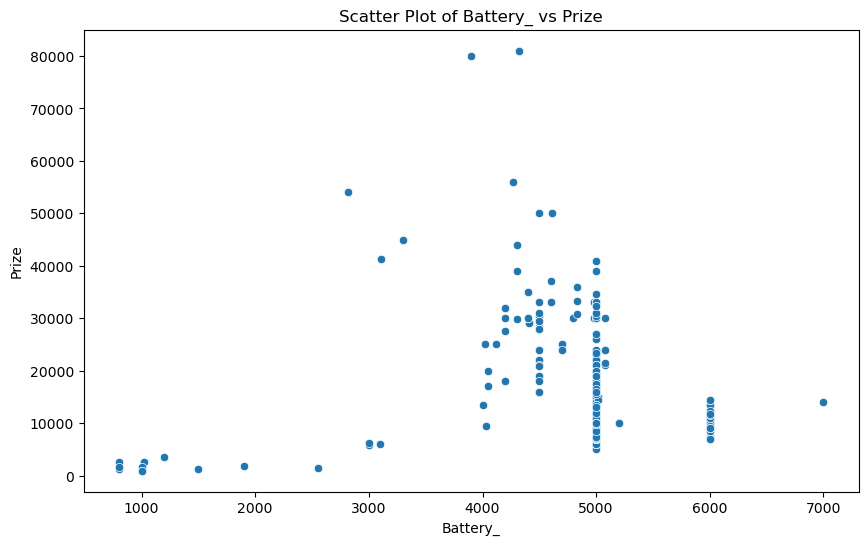

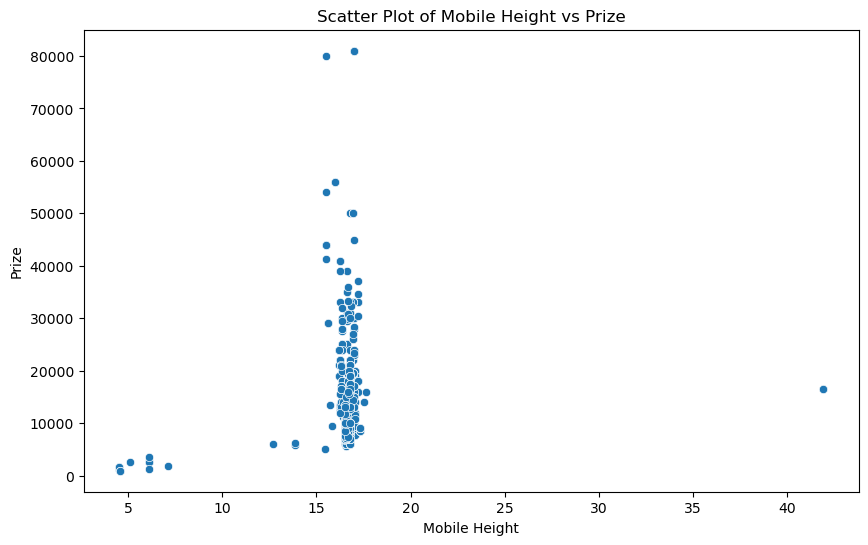

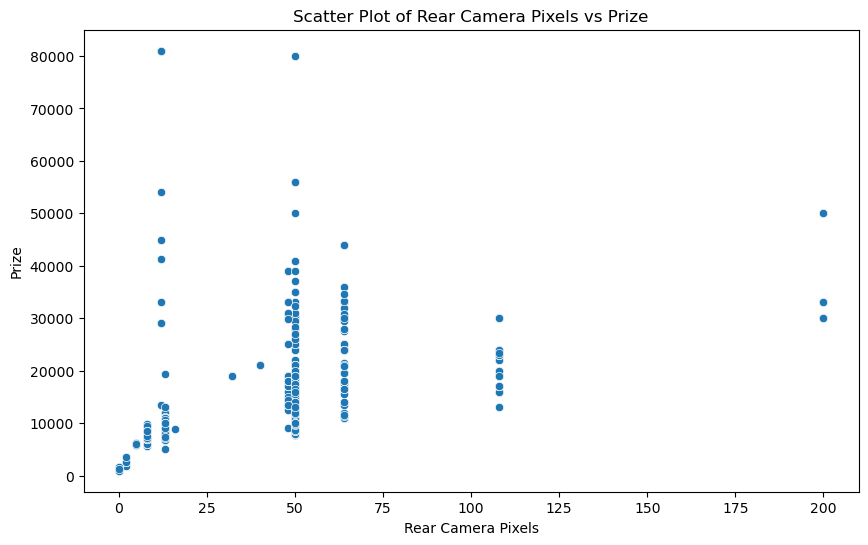

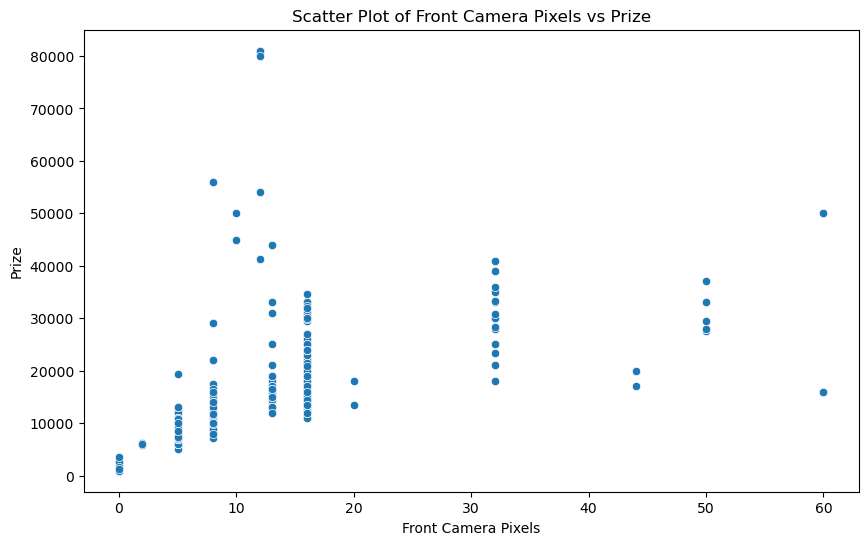

In [32]:
# Scatter plots for continuous variables against the target variable 'Prize'
for col in continuous_cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[col], y=df['Prize'])
    plt.title(f'Scatter Plot of {col} vs Prize')
    plt.xlabel(col)
    plt.ylabel('Prize')
    plt.show()

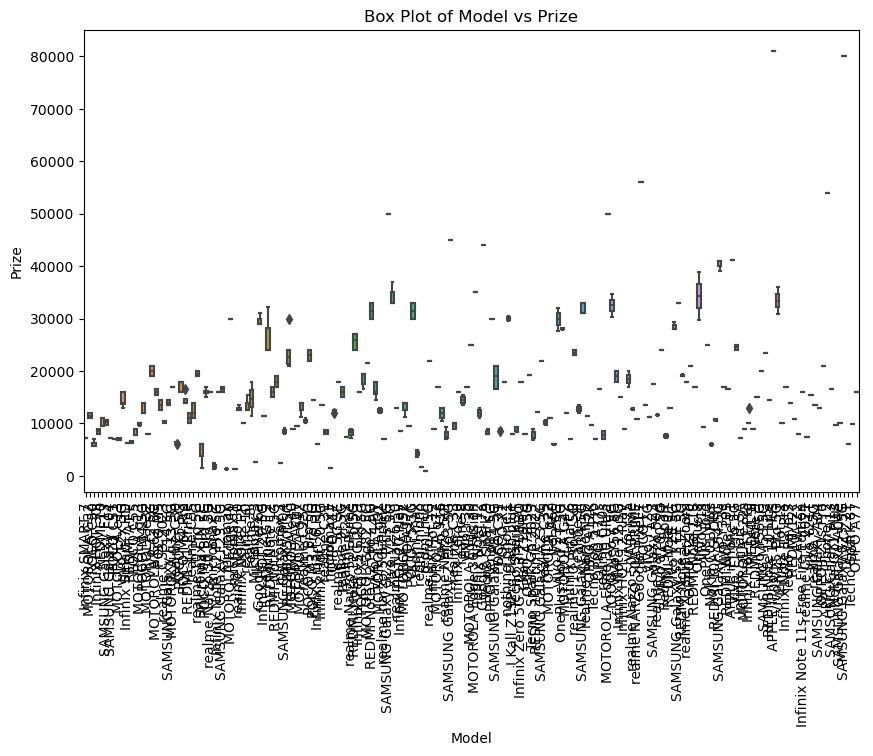

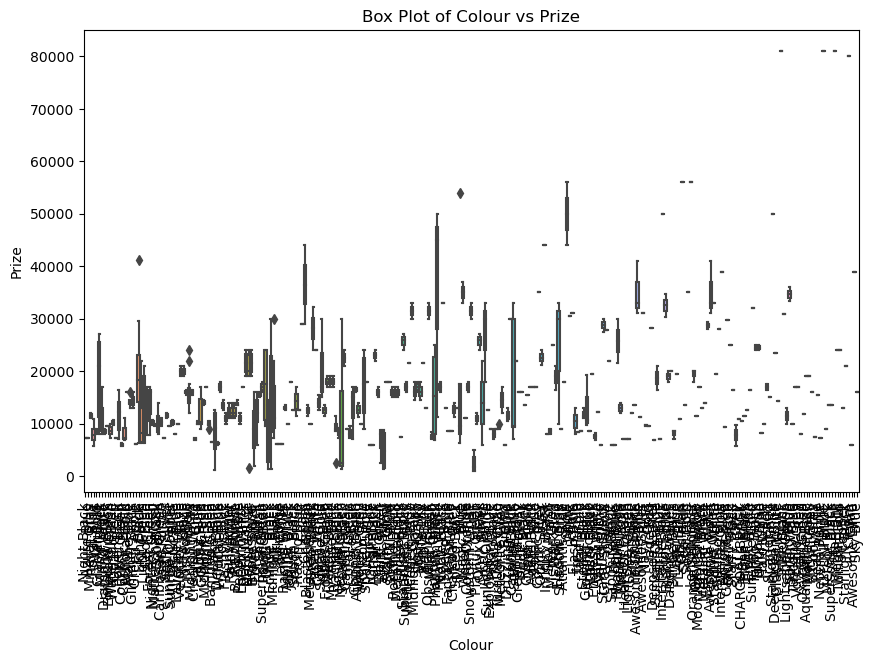

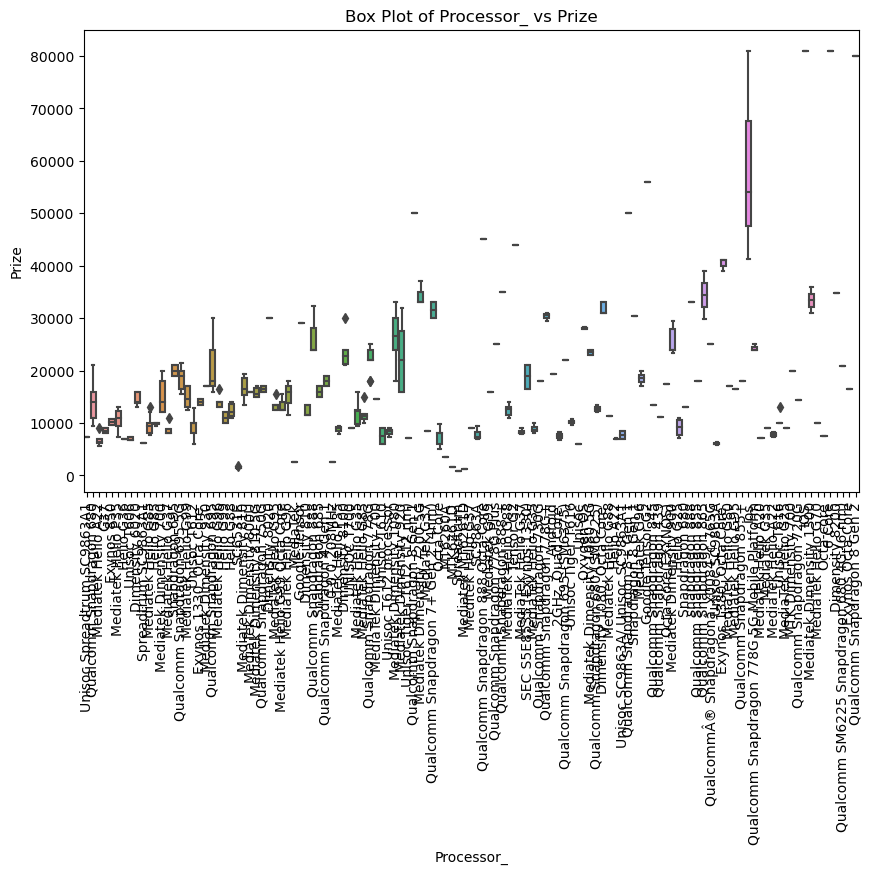

In [33]:
# Box plots for categorical variables against the target variable 'Prize'
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col], y=df['Prize'])
    plt.title(f'Box Plot of {col} vs Prize')
    plt.xlabel(col)
    plt.ylabel('Prize')
    plt.xticks(rotation=90)
    plt.show()

# Function to remove outliers using the IQR method

In [34]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


## Remove outliers for each continuous column

In [35]:
for col in continuous_cols + discrete_cols:
    df = remove_outliers(df, col)

# Visualizations after removing outliers

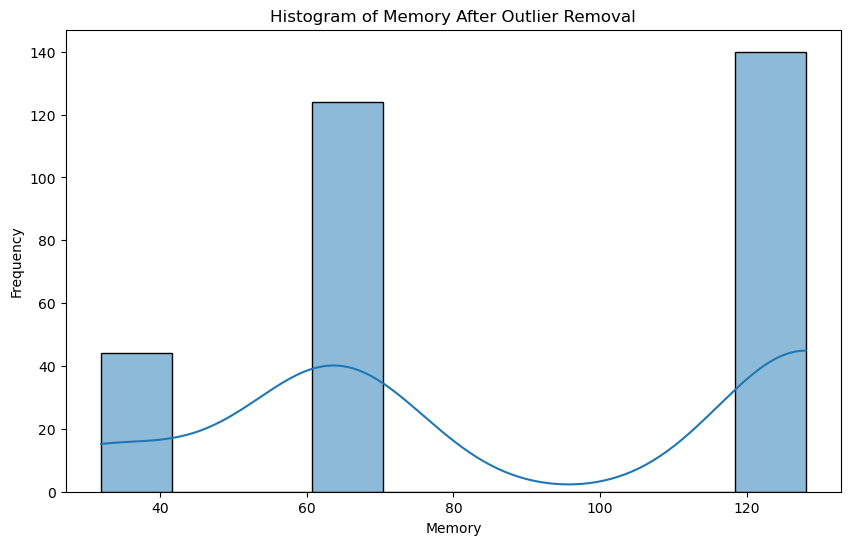

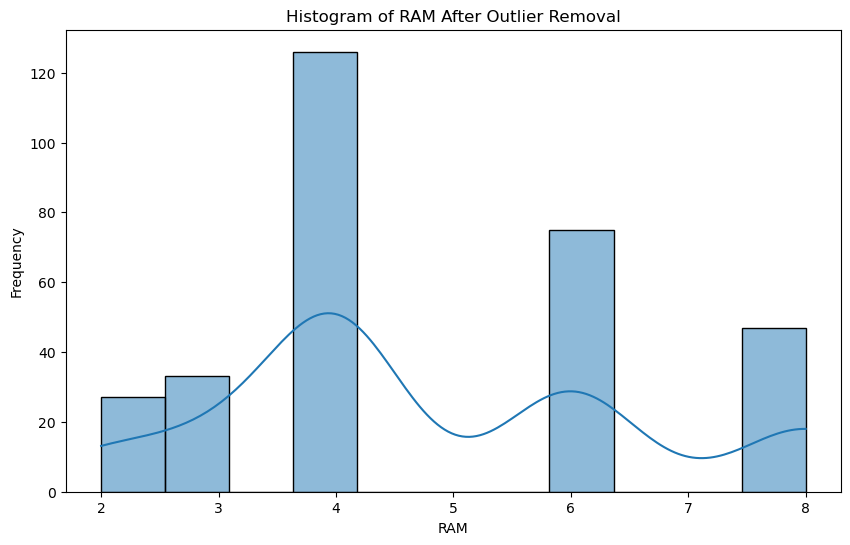

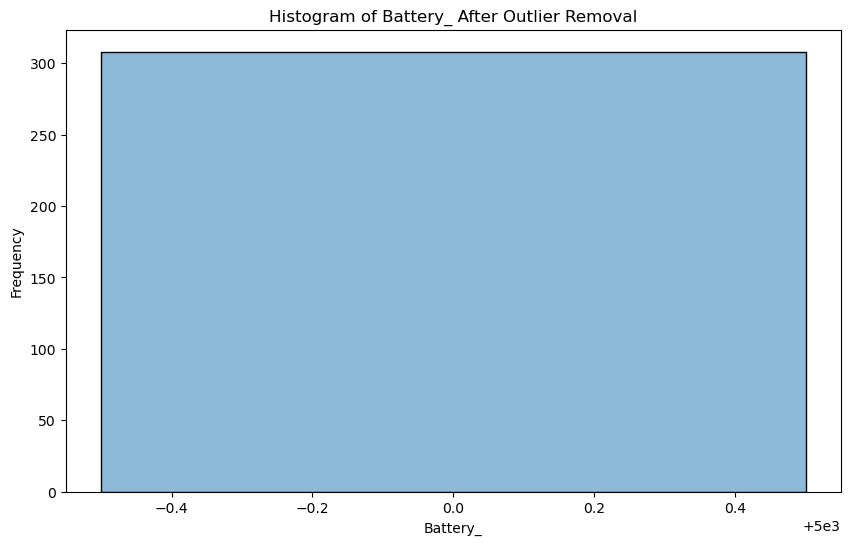

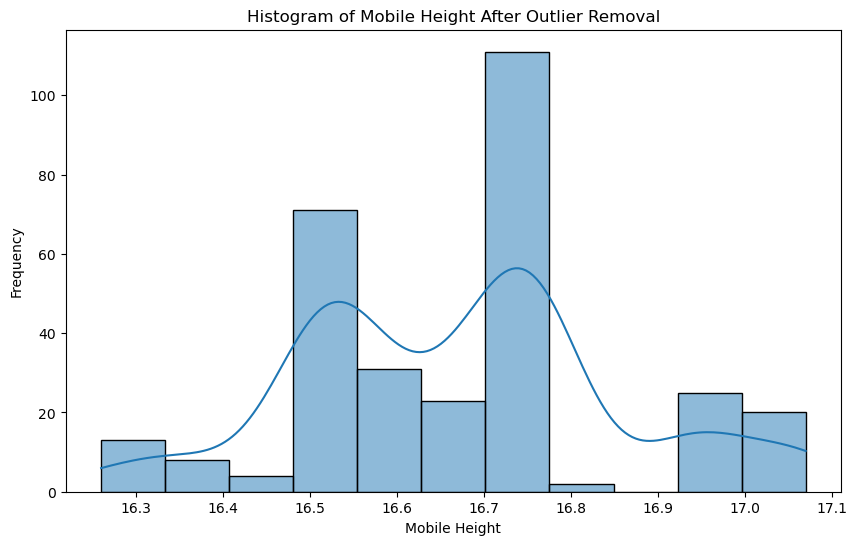

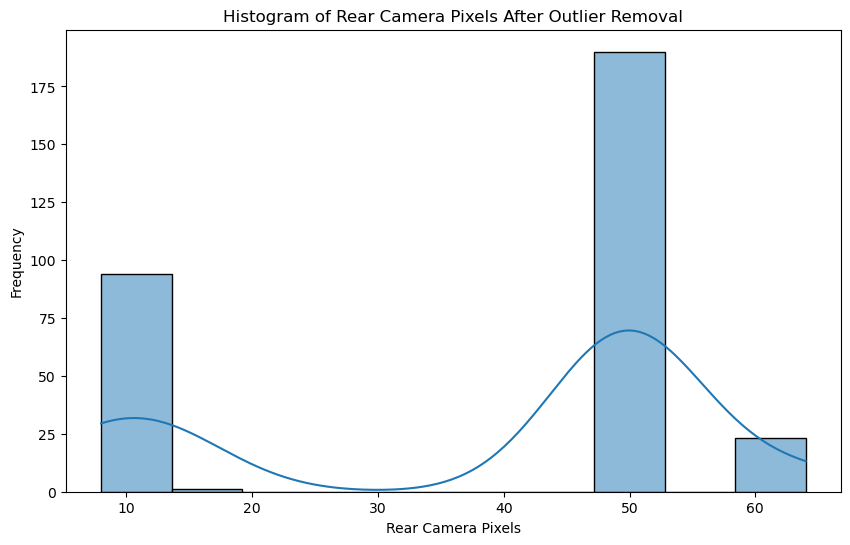

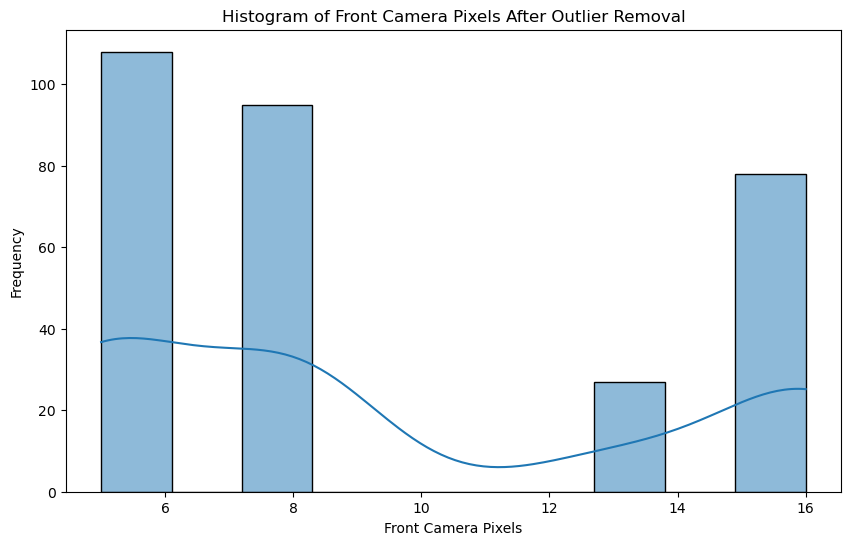

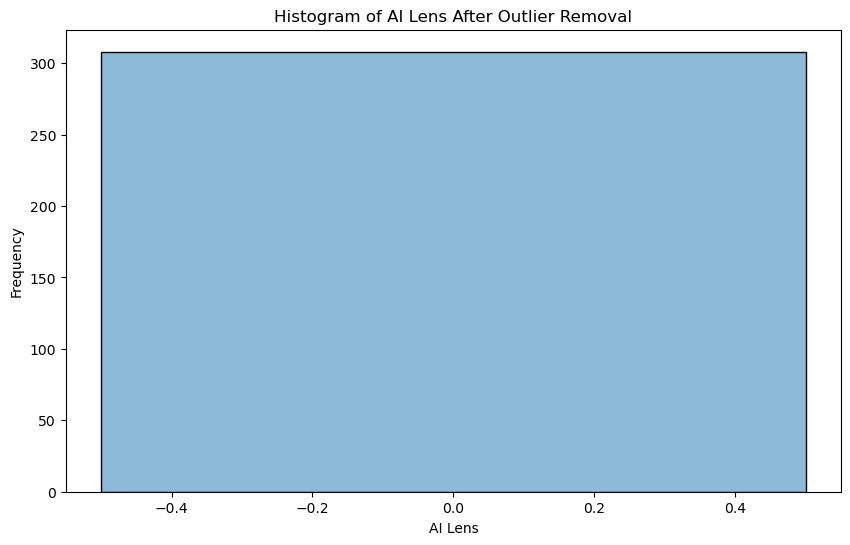

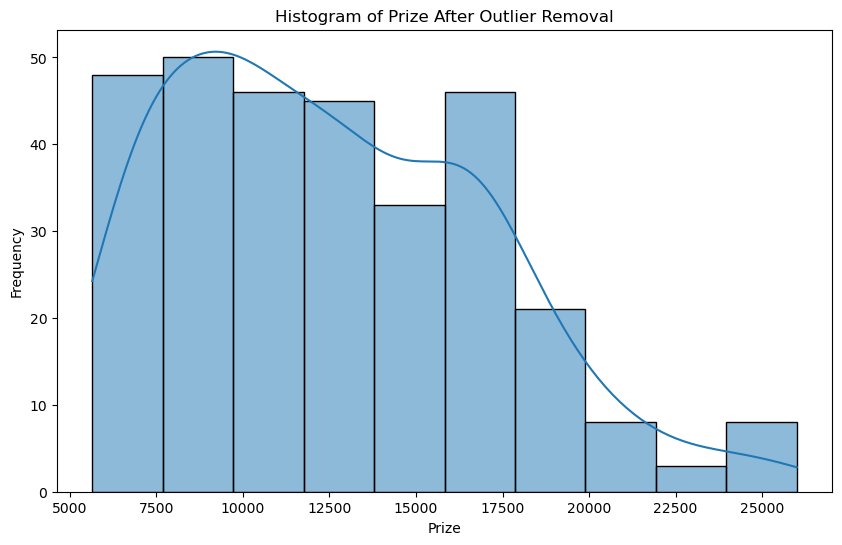

In [37]:
# Histograms for continuous and discrete columns
for col in continuous_cols + discrete_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col} After Outlier Removal')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

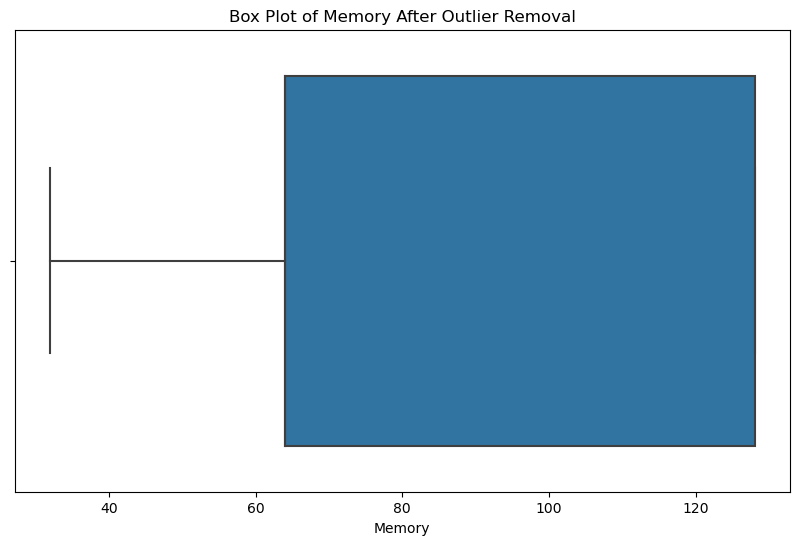

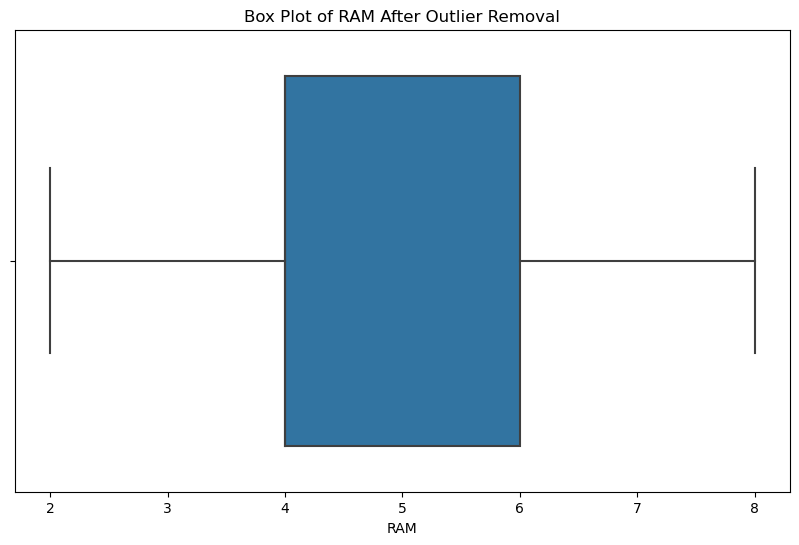

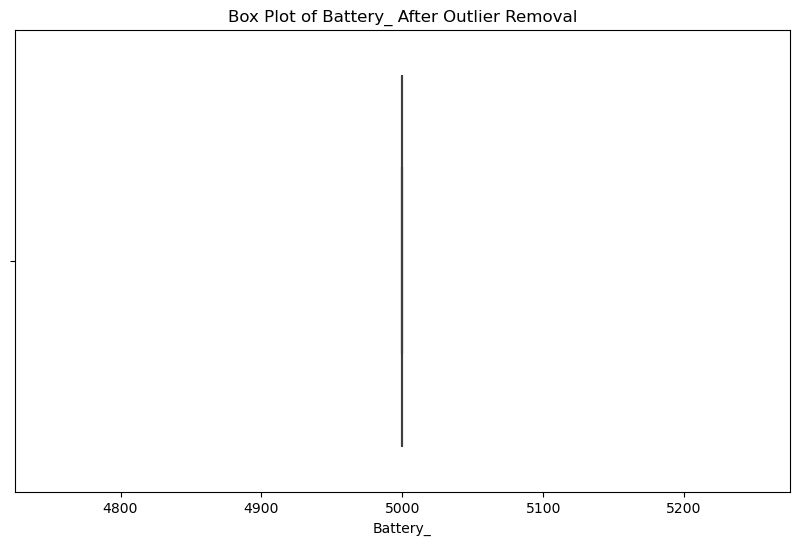

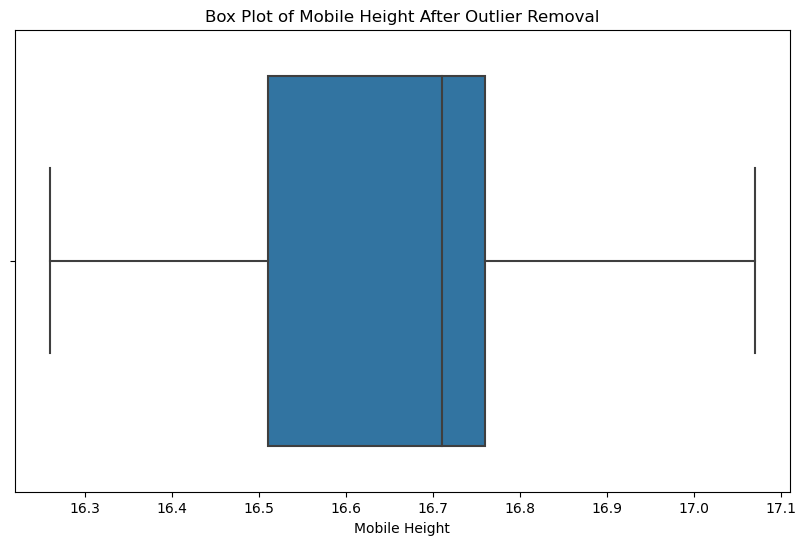

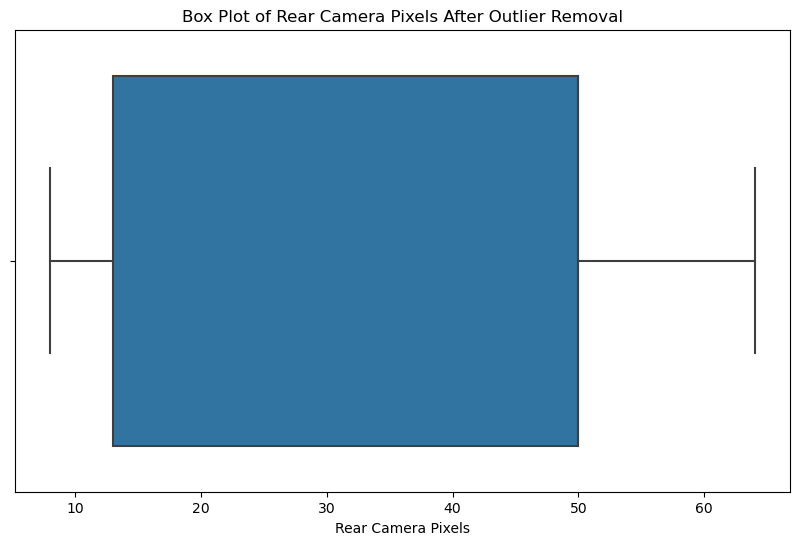

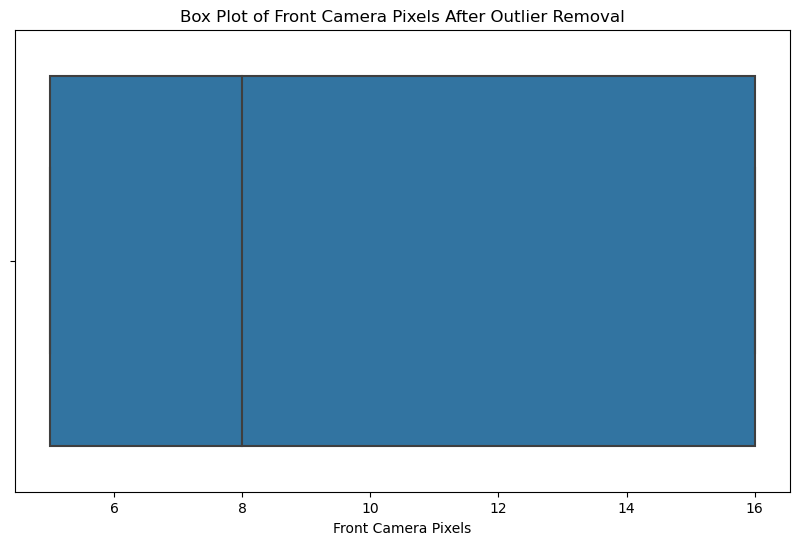

In [38]:
# Box plots for continuous columns
for col in continuous_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col} After Outlier Removal')
    plt.xlabel(col)
    plt.show()


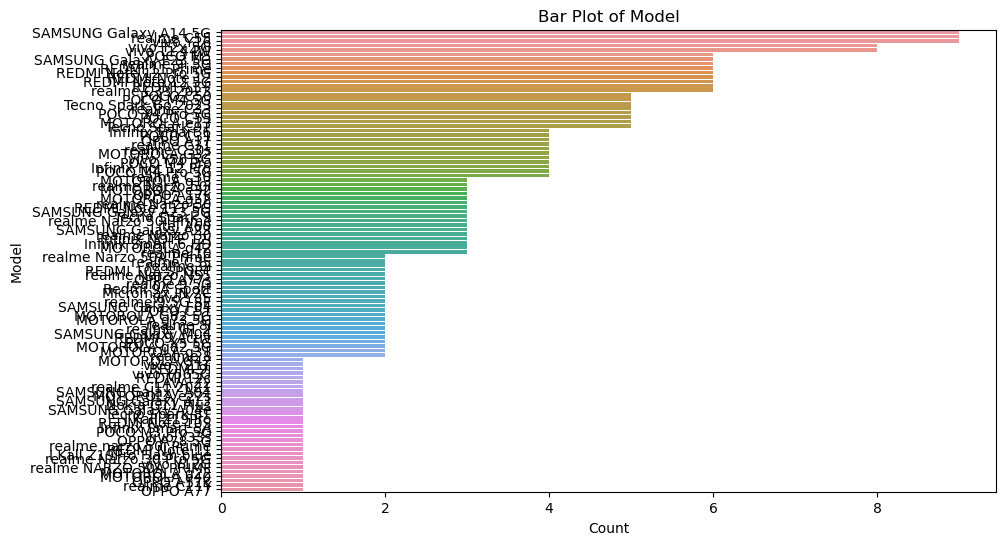

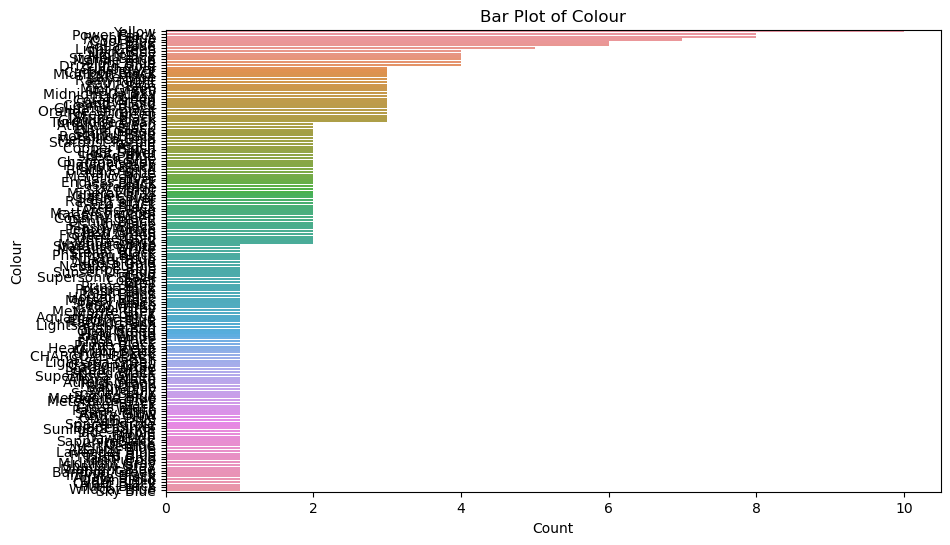

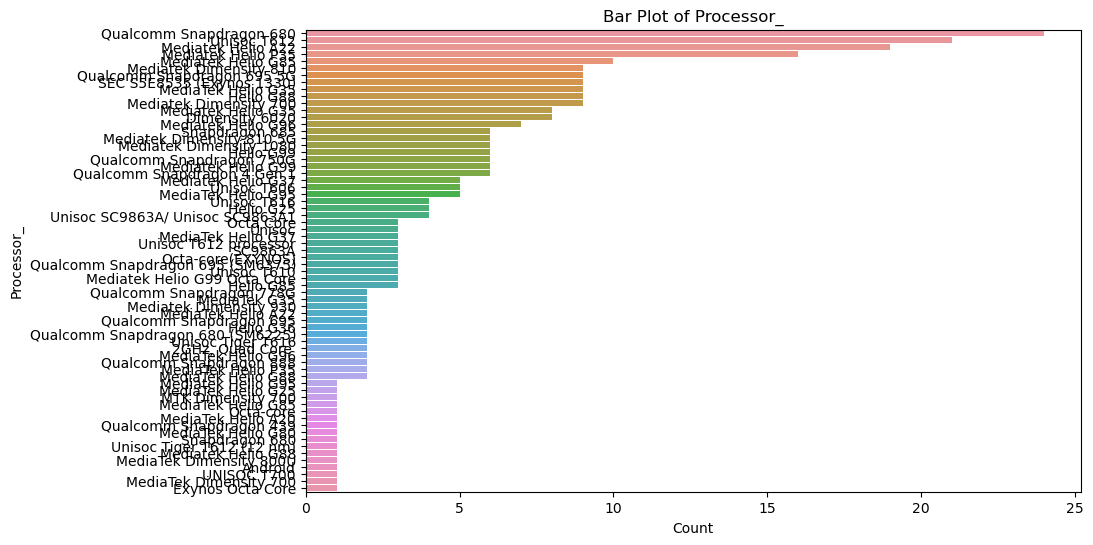

In [39]:
# Bar plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Bar Plot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

<Figure size 1200x1200 with 0 Axes>

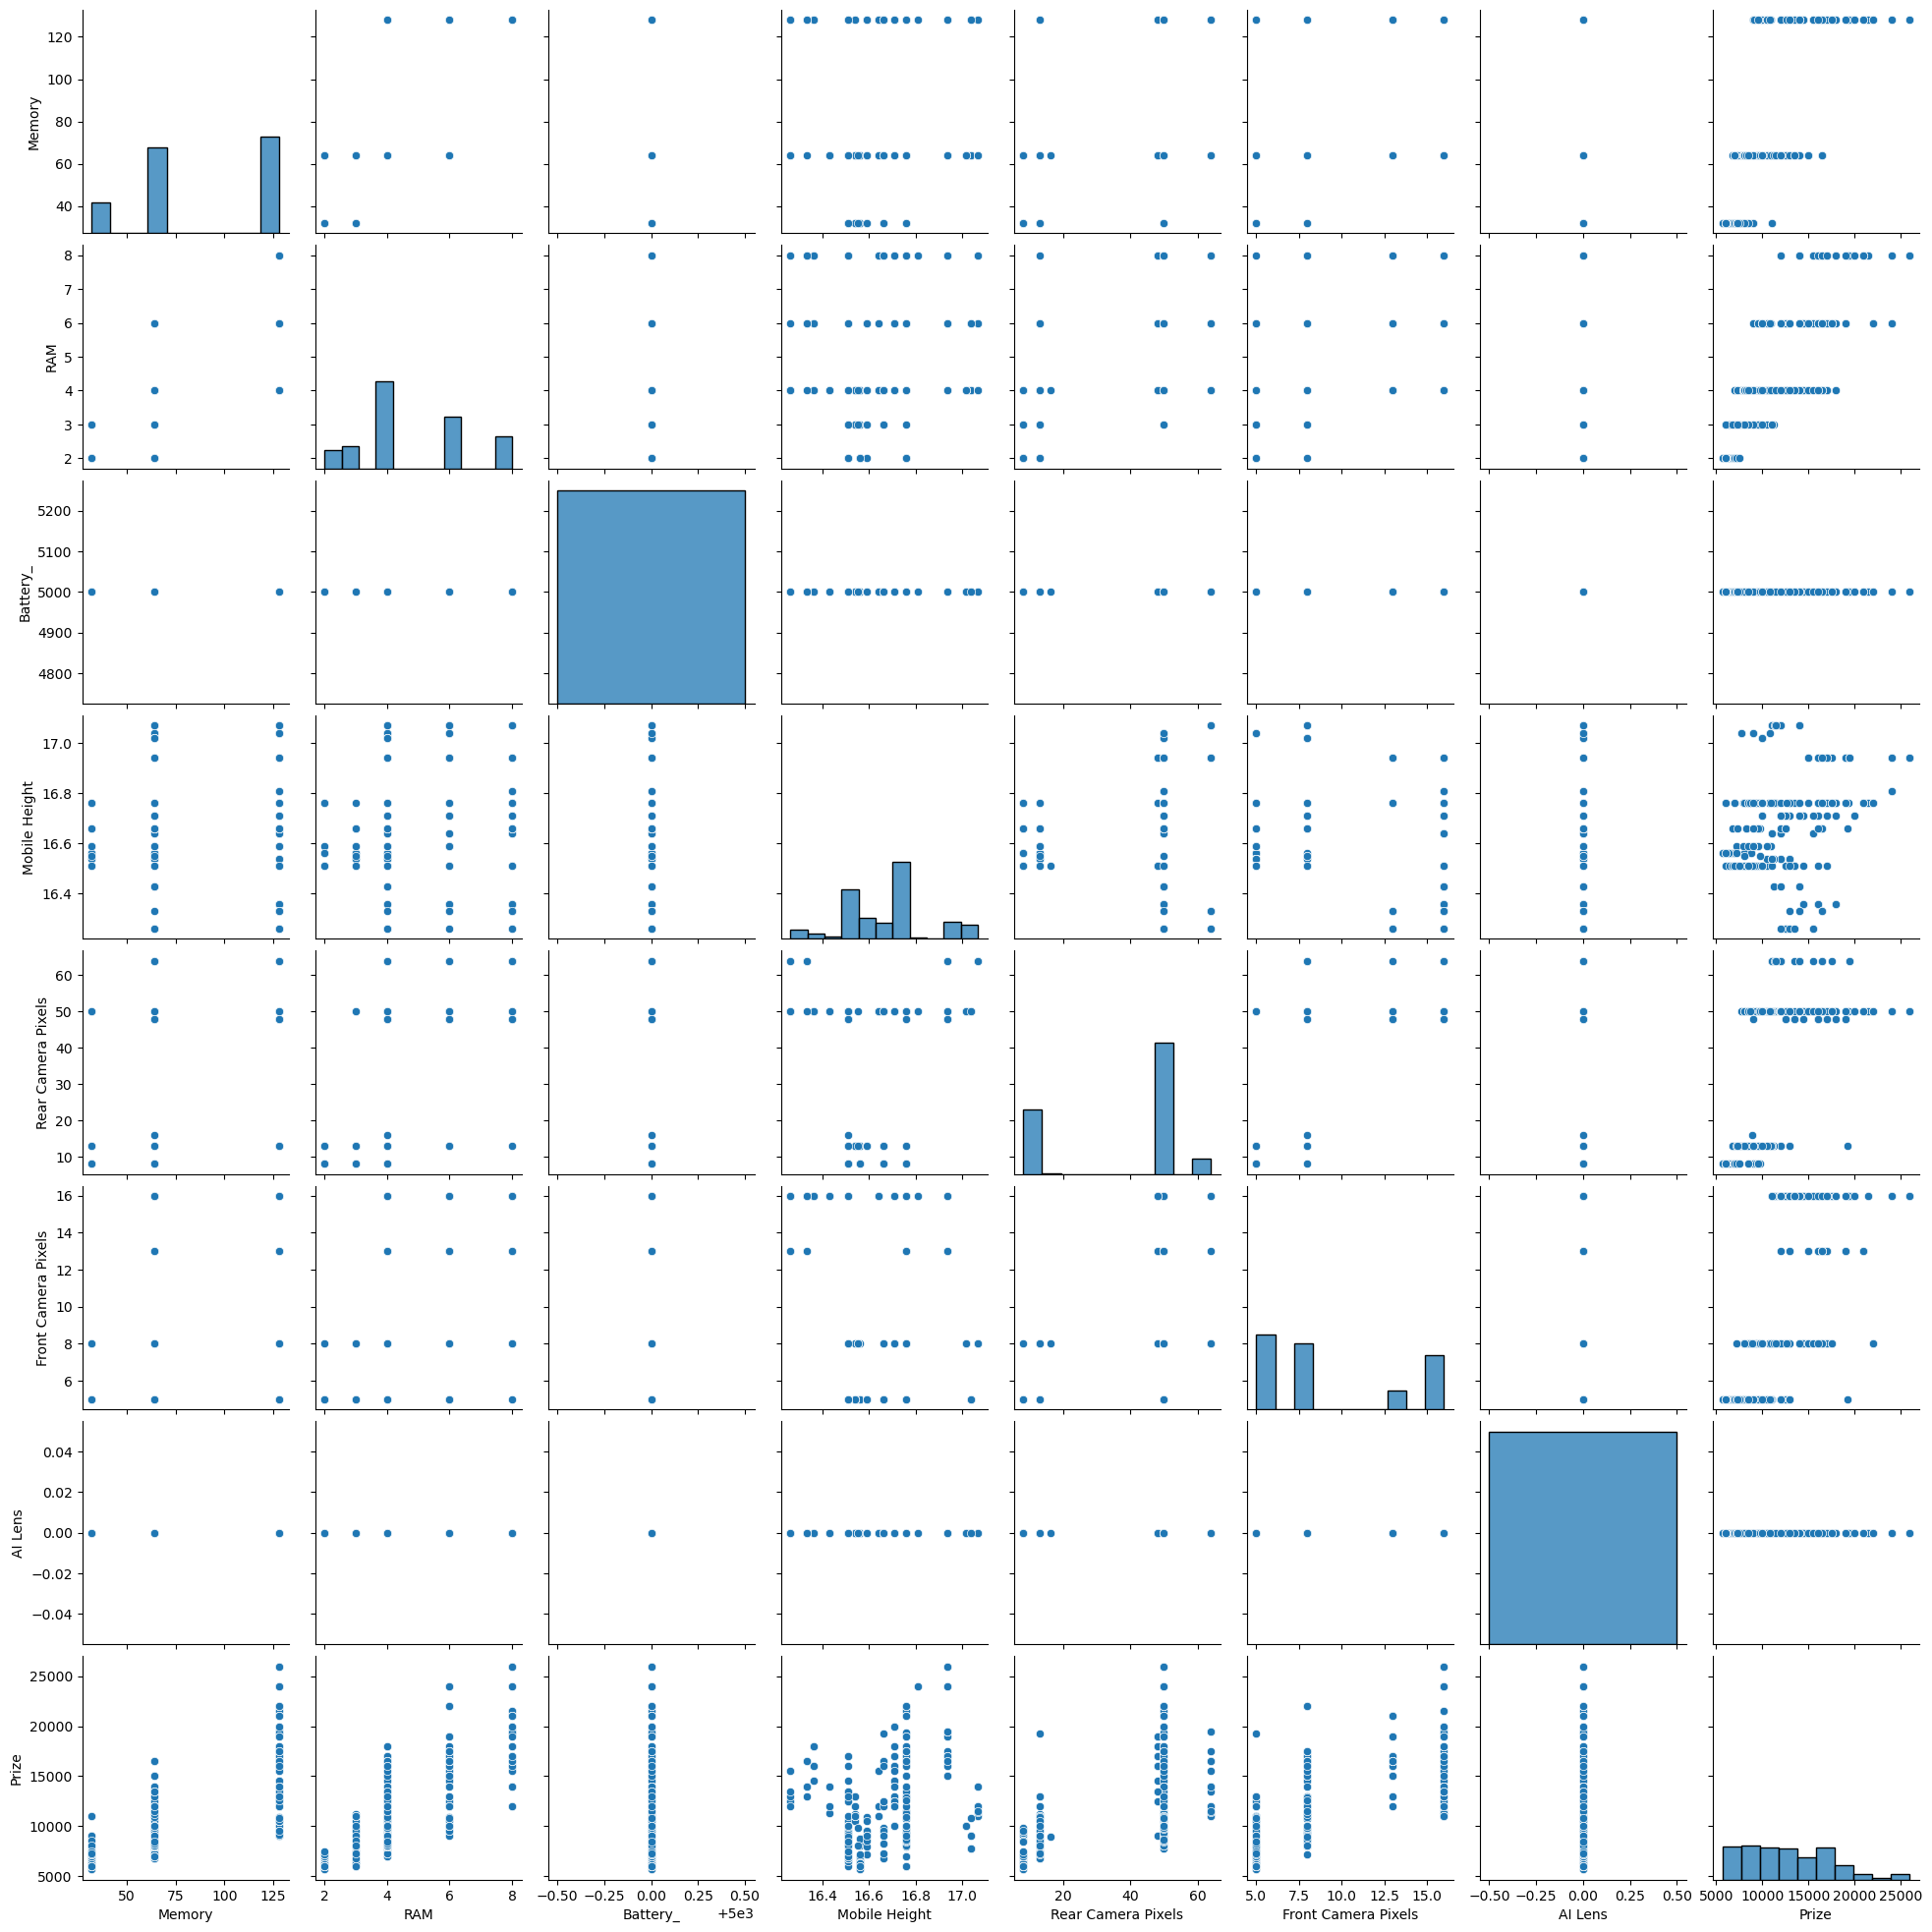

In [40]:
# Pair plots for relationships between numerical features
plt.figure(figsize=(12, 12))
sns.pairplot(df[continuous_cols + discrete_cols])
plt.show()

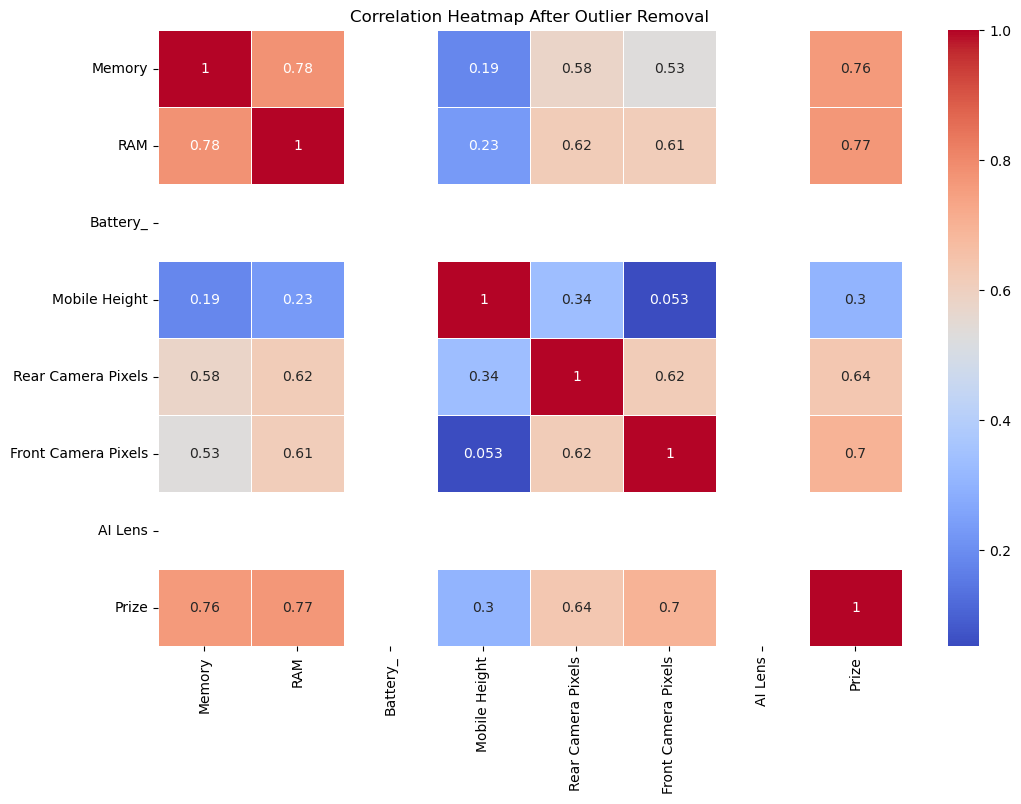

In [41]:
# Heatmap for correlation between numerical features
plt.figure(figsize=(12, 8))
corr_matrix = df[continuous_cols + discrete_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap After Outlier Removal')
plt.show()

In [42]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Model Development

In [43]:
# Split the data into features and target variable
target_variable = 'Prize'
X = df.drop(target_variable, axis=1)
y = df[target_variable]

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Model Evaluation

In [49]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [50]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 669.7746370967742
Mean Squared Error: 866402.292502158
Root Mean Squared Error: 930.8073337174337
R^2 Score: 0.9523735211389159


* The metrics indicated a strong predictive capability of the model, with an R² score close to 1 signifying good fit.

# Results Visualization

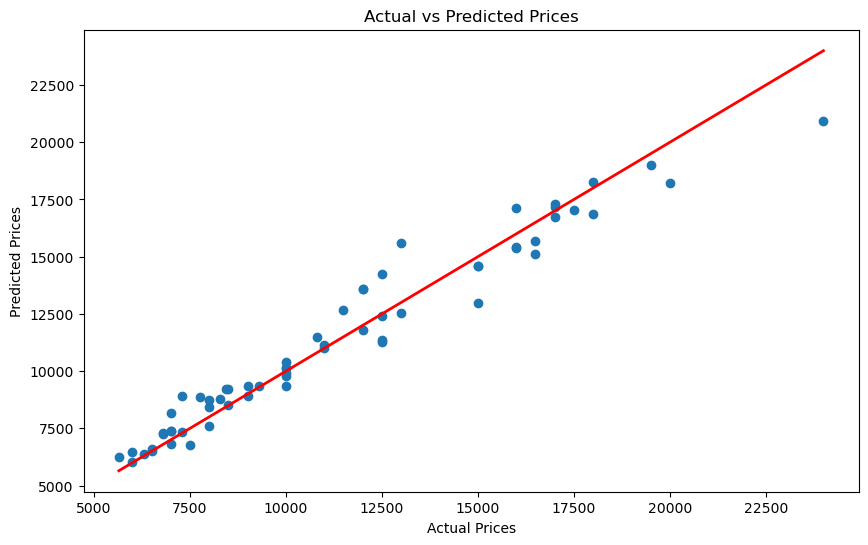

In [51]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

* Actual vs. Predicted Prices*: A scatter plot was created, showcasing the model's predictions against actual prices, demonstrating a close alignment.

 # Conclusion

* The Random Forest model effectively predicts mobile phone prices based on various features.
* These parameters collectively influence the pricing model, as they encapsulate the core aspects of mobile technology and consumer preferences, leading to variations in market pricing.